**Summary**: The complete Shakya et al. dataset and subsamples of this dataset (10%, 25%, and 50%) were trimmed at quality scores of 2 and 30 using trimmomatic and classified with sourmash gather. All sourmash signatures were calculated with --scaled values of 10000, k values of 21, 31 and 51, and abundance tracking. Jaccard indices were calculated with sourmash compare. 

```
for i in $(cat comparison_file_names.txt); do osf -u philliptbrooks@gmail.com -p dm938 fetch osfstorage/taxonomic_classification/sourmash/${i} ${PWD}/${i}; echo ${i}; done
```

(comparison_file_names.txt can be found [here](https://github.com/dahak-metagenomics/dahak/tree/master/workflows/comparison))

In [1]:
%matplotlib inline

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#### First, comparing quality trimmed reads and from the complete and subsampled data at three k-mer sizes. 

Text(0.5,0.98,'Shakya Complete and Subsampled with Variable Quality Trimming and K = 21')

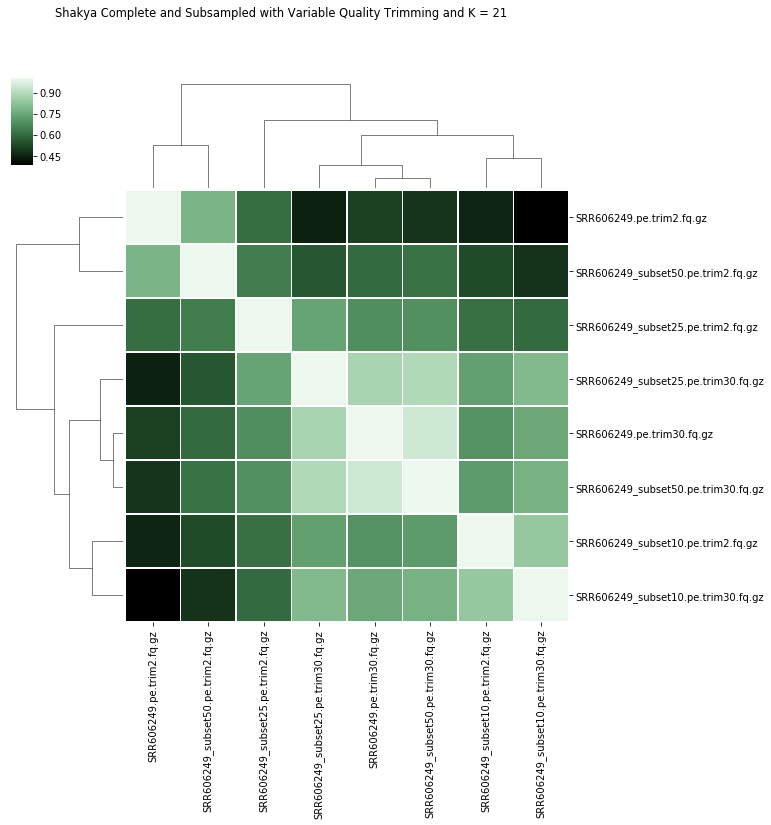

In [3]:
df = pd.read_csv("SRR606249.pe.trim2and30_comparison.k21.csv")
dfnew = df.rename(index=str, columns={'/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim2.fq.gz': 'SRR606249_subset10.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim30.fq.gz': 'SRR606249_subset10.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim2.fq.gz': 'SRR606249_subset25.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim30.fq.gz':	'SRR606249_subset25.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim2.fq.gz': 'SRR606249_subset50.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim30.fq.gz':  'SRR606249_subset50.pe.trim30.fq.gz'}) 
dfnew [''] = ("SRR606249.pe.trim2.fq.gz", "SRR606249.pe.trim30.fq.gz", "SRR606249_subset10.pe.trim2.fq.gz", "SRR606249_subset10.pe.trim30.fq.gz", "SRR606249_subset25.pe.trim2.fq.gz", "SRR606249_subset25.pe.trim30.fq.gz", "SRR606249_subset50.pe.trim2.fq.gz", "SRR606249_subset50.pe.trim30.fq.gz")
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_reads_k21.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 21') 

Text(0.5,0.98,'Shakya Complete and Subsampled with Variable Quality Trimming and K = 31')

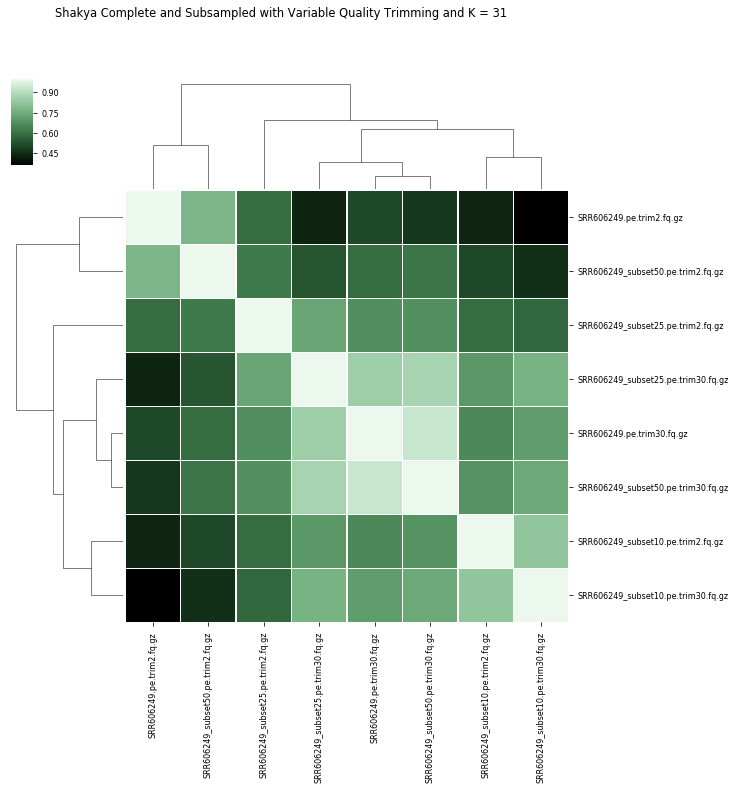

In [4]:
df = pd.read_csv("SRR606249.pe.trim2and30_comparison.k31.csv")
dfnew = df.rename(index=str, columns={'/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim2.fq.gz': 'SRR606249_subset10.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim30.fq.gz': 'SRR606249_subset10.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim2.fq.gz': 'SRR606249_subset25.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim30.fq.gz':	'SRR606249_subset25.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim2.fq.gz': 'SRR606249_subset50.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim30.fq.gz':  'SRR606249_subset50.pe.trim30.fq.gz'}) 
dfnew [''] = ("SRR606249.pe.trim2.fq.gz", "SRR606249.pe.trim30.fq.gz", "SRR606249_subset10.pe.trim2.fq.gz", "SRR606249_subset10.pe.trim30.fq.gz", "SRR606249_subset25.pe.trim2.fq.gz", "SRR606249_subset25.pe.trim30.fq.gz", "SRR606249_subset50.pe.trim2.fq.gz", "SRR606249_subset50.pe.trim30.fq.gz")
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_reads_k31.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 31') 

Text(0.5,0.98,'Shakya Complete and Subsampled with Variable Quality Trimming and K = 51')

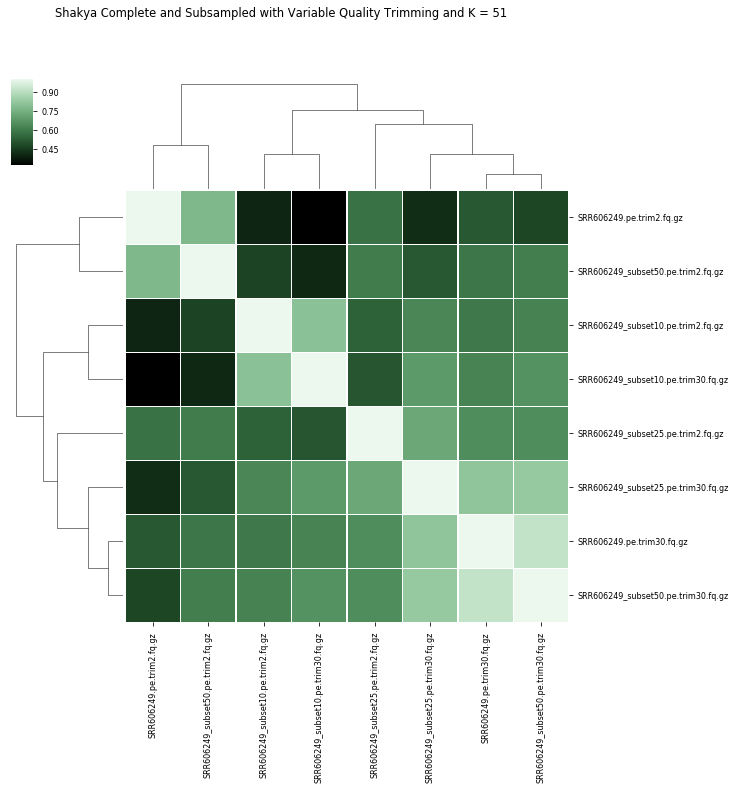

In [5]:
df = pd.read_csv("SRR606249.pe.trim2and30_comparison.k51.csv")
dfnew = df.rename(index=str, columns={'/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim2.fq.gz': 'SRR606249_subset10.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset10.pe.trim30.fq.gz': 'SRR606249_subset10.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim2.fq.gz': 'SRR606249_subset25.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset25.pe.trim30.fq.gz': 'SRR606249_subset25.pe.trim30.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim2.fq.gz': 'SRR606249_subset50.pe.trim2.fq.gz',
                                      '/data/SRR606249_subset50.pe.trim30.fq.gz':  'SRR606249_subset50.pe.trim30.fq.gz'}) 
dfnew [''] = ("SRR606249.pe.trim2.fq.gz", "SRR606249.pe.trim30.fq.gz", "SRR606249_subset10.pe.trim2.fq.gz", "SRR606249_subset10.pe.trim30.fq.gz", "SRR606249_subset25.pe.trim2.fq.gz", "SRR606249_subset25.pe.trim30.fq.gz", "SRR606249_subset50.pe.trim2.fq.gz", "SRR606249_subset50.pe.trim30.fq.gz")
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_reads_k51.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 51') 

#### Second, comparing k-mer content of assemblies from SPAdes and MEGAHIT from complete and subsampled datasets with light and aggressive trimming. 

Text(0.5,0.98,'Shakya Complete and Subsampled data Assembled with MEGAHIT or SPAdes with Variable Quality Trimming and K = 21')

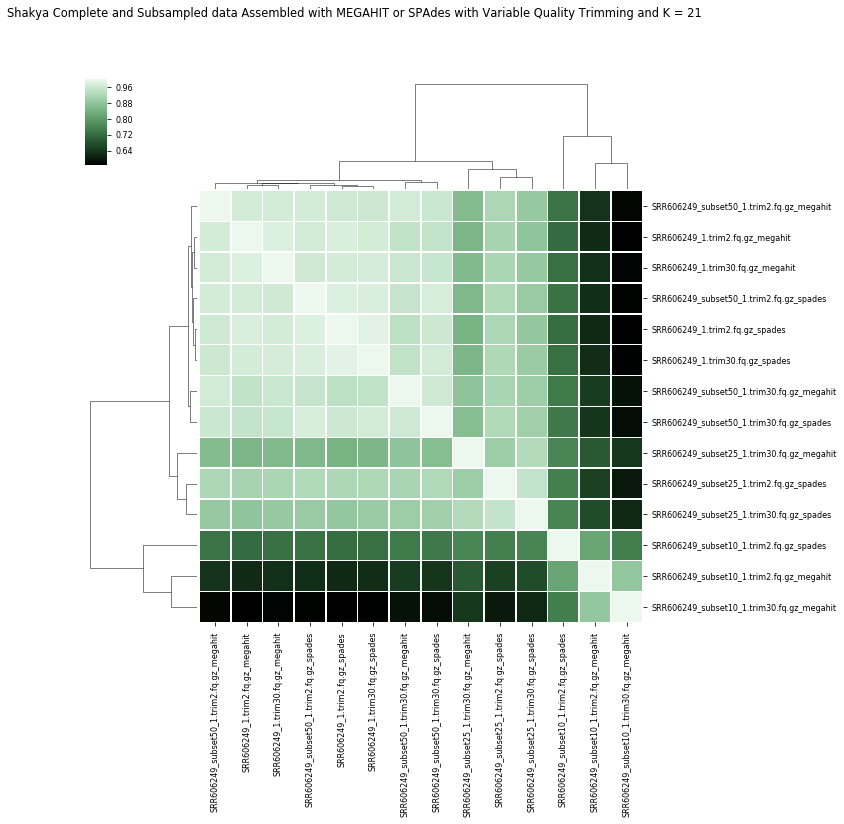

In [6]:
df = pd.read_csv("SRR606249.pe.trim2and30_megahitandspades_comparison.k21.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset10_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset25_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim30.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim2.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim30.fq.gz_spades'})

dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 
              'SRR606249_1.trim2.fq.gz_spades', 
              'SRR606249_1.trim30.fq.gz_megahit', 
              'SRR606249_1.trim30.fq.gz_spades',
              'SRR606249_subset10_1.trim2.fq.gz_megahit', 
              'SRR606249_subset10_1.trim2.fq.gz_spades', 
              'SRR606249_subset10_1.trim30.fq.gz_megahit',
              'SRR606249_subset25_1.trim2.fq.gz_spades',
              'SRR606249_subset25_1.trim30.fq.gz_megahit', 
              'SRR606249_subset25_1.trim30.fq.gz_spades', 
              'SRR606249_subset50_1.trim2.fq.gz_megahit',
              'SRR606249_subset50_1.trim2.fq.gz_spades', 
              'SRR606249_subset50_1.trim30.fq.gz_megahit', 
              'SRR606249_subset50_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_assemblies_k21.pdf")
o.fig.suptitle('Shakya Complete and Subsampled data Assembled with MEGAHIT or SPAdes with Variable Quality Trimming and K = 21') 

Text(0.5,0.98,'Shakya Complete and Subsampled with Variable Quality Trimming and K = 31')

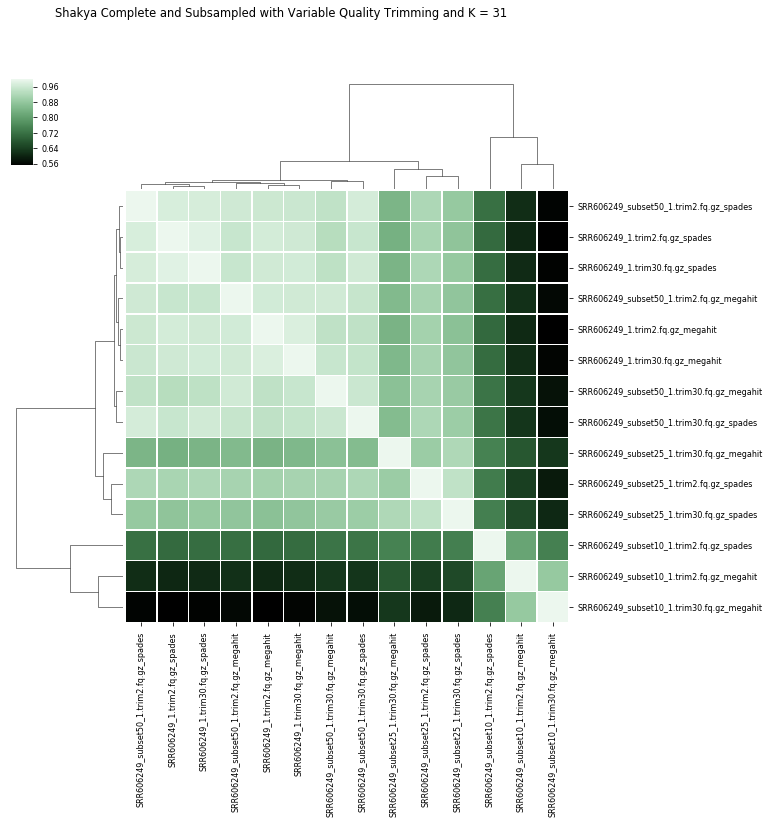

In [7]:
df = pd.read_csv("SRR606249.pe.trim2and30_megahitandspades_comparison.k31.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset10_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset25_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim30.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim2.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim30.fq.gz_spades'})

dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 
              'SRR606249_1.trim2.fq.gz_spades', 
              'SRR606249_1.trim30.fq.gz_megahit', 
              'SRR606249_1.trim30.fq.gz_spades',
              'SRR606249_subset10_1.trim2.fq.gz_megahit', 
              'SRR606249_subset10_1.trim2.fq.gz_spades', 
              'SRR606249_subset10_1.trim30.fq.gz_megahit',
              'SRR606249_subset25_1.trim2.fq.gz_spades',
              'SRR606249_subset25_1.trim30.fq.gz_megahit', 
              'SRR606249_subset25_1.trim30.fq.gz_spades', 
              'SRR606249_subset50_1.trim2.fq.gz_megahit',
              'SRR606249_subset50_1.trim2.fq.gz_spades', 
              'SRR606249_subset50_1.trim30.fq.gz_megahit', 
              'SRR606249_subset50_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_assemblies_k31.pdf")

o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 31') 

Text(0.5,0.98,'Shakya Complete and Subsampled with Variable Quality Trimming and K = 51')

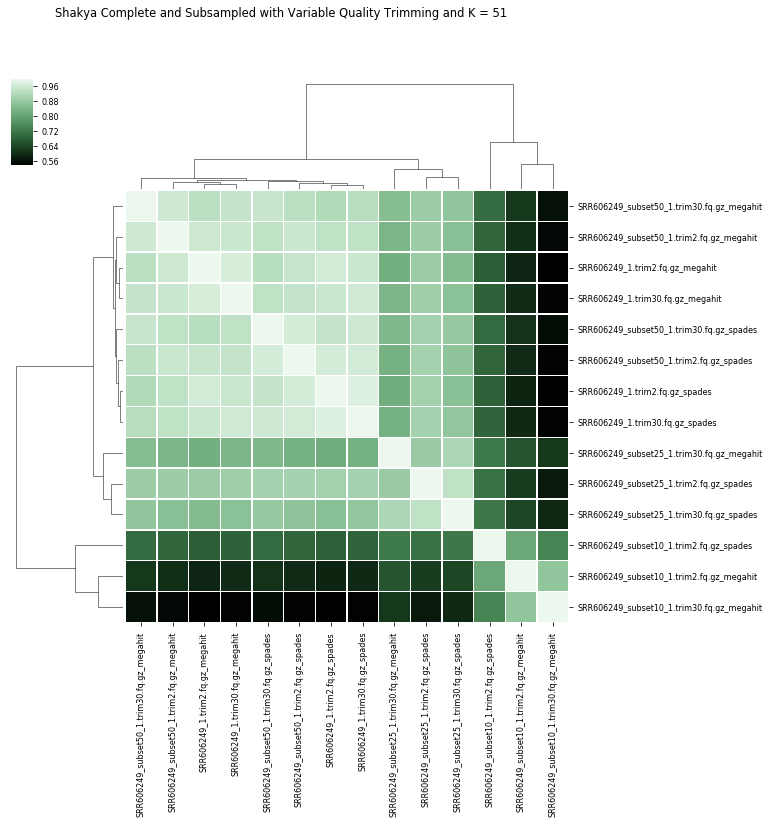

In [8]:
df = pd.read_csv("SRR606249.pe.trim2and30_megahitandspades_comparison.k51.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa':'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset10_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset10_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset10_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim2.fq.gz_spades',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset25_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset25_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset25_1.trim30.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim2.fq.gz_spades',	
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_subset50_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_subset50_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_subset50_1.trim30.fq.gz_spades'})

dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 
              'SRR606249_1.trim2.fq.gz_spades', 
              'SRR606249_1.trim30.fq.gz_megahit', 
              'SRR606249_1.trim30.fq.gz_spades',
              'SRR606249_subset10_1.trim2.fq.gz_megahit', 
              'SRR606249_subset10_1.trim2.fq.gz_spades', 
              'SRR606249_subset10_1.trim30.fq.gz_megahit',
              'SRR606249_subset25_1.trim2.fq.gz_spades',
              'SRR606249_subset25_1.trim30.fq.gz_megahit', 
              'SRR606249_subset25_1.trim30.fq.gz_spades', 
              'SRR606249_subset50_1.trim2.fq.gz_megahit',
              'SRR606249_subset50_1.trim2.fq.gz_spades', 
              'SRR606249_subset50_1.trim30.fq.gz_megahit', 
              'SRR606249_subset50_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_assemblies_k51.pdf")
o.fig.suptitle('Shakya Complete and Subsampled with Variable Quality Trimming and K = 51') 

#### Now, comparing k-mers content in reads to assembled contigs at three k-mer sizes and light or aggressive trimming.

Text(0.5,0.98,'Shakya Complete and Subsampled, Assemblies and Reads, with Variable Quality Trimming and K = 21')

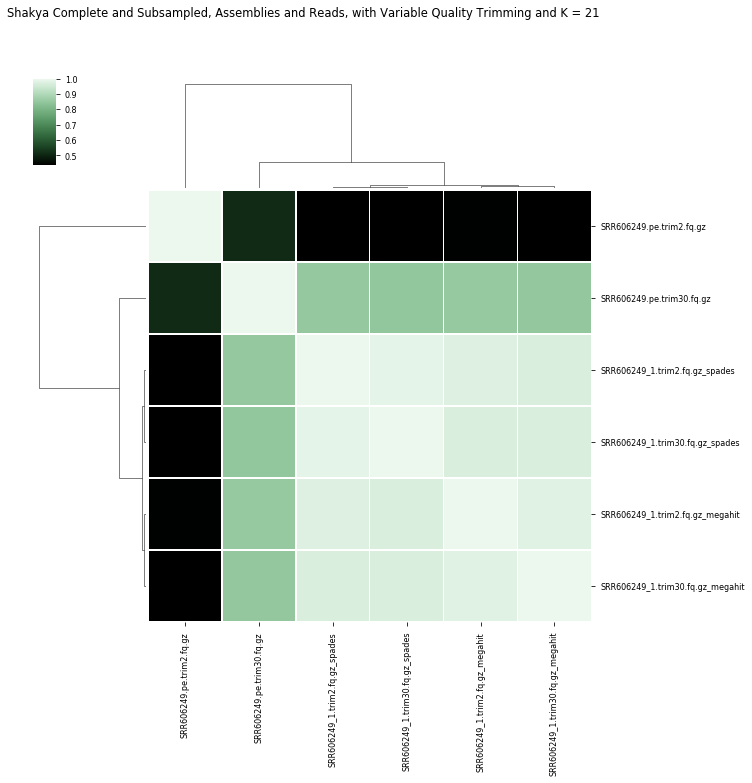

In [9]:
df = pd.read_csv("SRR606249.pe.trim2and30_readstoassemblies_comparison.k21.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz', 
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades'})
dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 'SRR606249_1.trim2.fq.gz_spades', 'SRR606249.pe.trim2.fq.gz', 'SRR606249.pe.trim30.fq.gz', 'SRR606249_1.trim30.fq.gz_megahit', 'SRR606249_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_readstoassemblies_k21.pdf")
o.fig.suptitle('Shakya Complete and Subsampled, Assemblies and Reads, with Variable Quality Trimming and K = 21') 

Text(0.5,0.98,'Shakya Complete and Subsampled, Assemblies and Reads, with Variable Quality Trimming and K = 31')

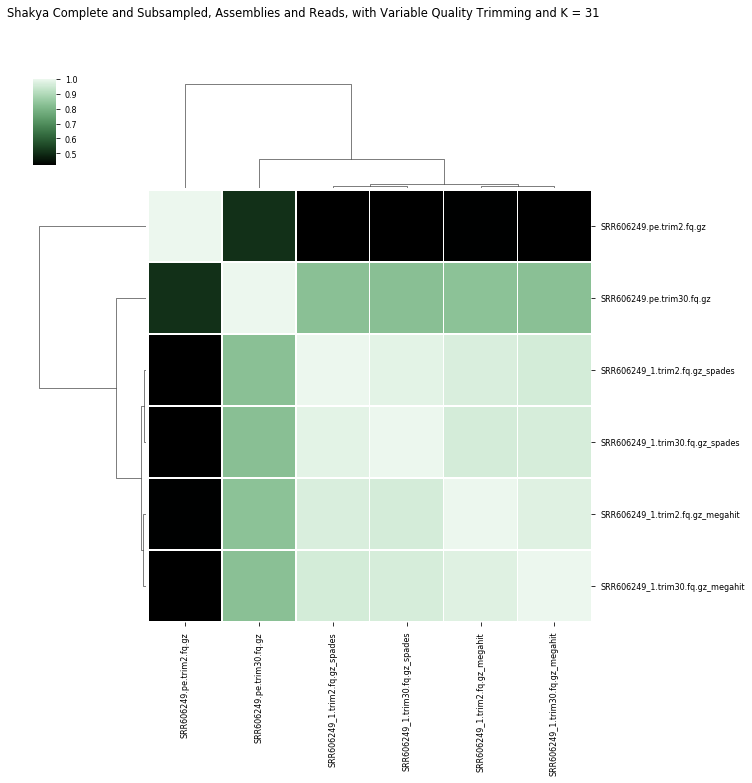

In [10]:
df = pd.read_csv("SRR606249.pe.trim2and30_readstoassemblies_comparison.k31.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz', 
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades'})
dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 'SRR606249_1.trim2.fq.gz_spades', 'SRR606249.pe.trim2.fq.gz', 'SRR606249.pe.trim30.fq.gz', 'SRR606249_1.trim30.fq.gz_megahit', 'SRR606249_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_readstoassemblies_k31.pdf")
o.fig.suptitle('Shakya Complete and Subsampled, Assemblies and Reads, with Variable Quality Trimming and K = 31') 

In [11]:
df

,/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa,/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta,/data/SRR606249.pe.trim2.fq.gz,/data/SRR606249.pe.trim30.fq.gz,/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa,/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta
0,1.000000,0.969910,0.429386,0.833580,0.978019,0.963432
1,0.969910,1.000000,0.427101,0.829417,0.961479,0.985081
2,0.429386,0.427101,1.000000,0.510772,0.424543,0.422969
3,0.833580,0.829417,0.510772,1.000000,0.830117,0.826771
4,0.978019,0.961479,0.424543,0.830117,1.000000,0.965982
5,0.963432,0.985081,0.422969,0.826771,0.965982,1.000000


Text(0.5,0.98,'Shakya Complete and Subsampled, Assemblies and Reads, with Variable Quality Trimming and K = 31')

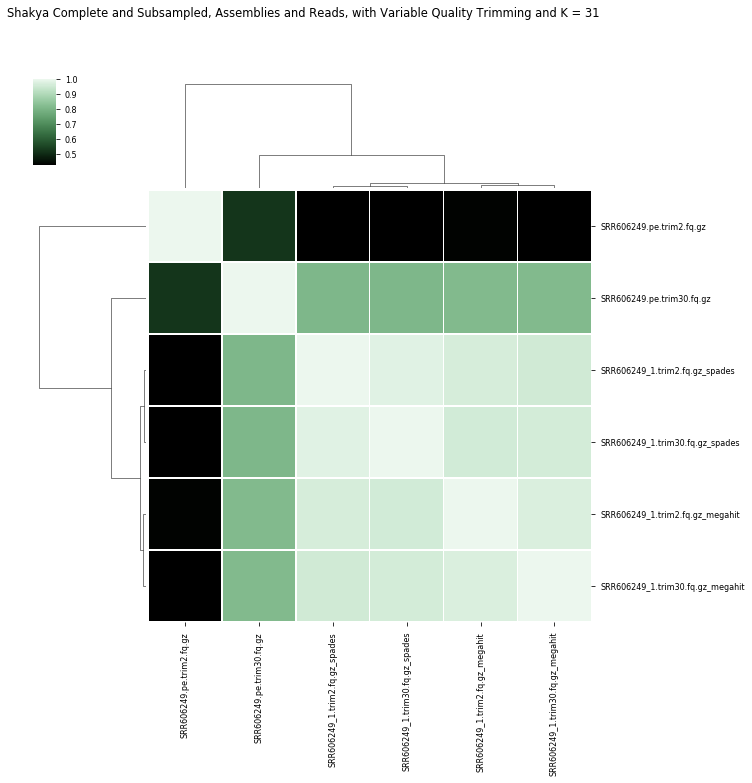

In [12]:
df = pd.read_csv("SRR606249.pe.trim2and30_readstoassemblies_comparison.k51.csv")
dfnew = df.rename(index=str, columns={'/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim2.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim2.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim2.fq.gz_spades',
                                      '/data/SRR606249.pe.trim2.fq.gz': 'SRR606249.pe.trim2.fq.gz',
                                      '/data/SRR606249.pe.trim30.fq.gz': 'SRR606249.pe.trim30.fq.gz', 
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_megahit_output/final.contigs.fa': 'SRR606249_1.trim30.fq.gz_megahit',
                                      '/data/osfstorage/assembly/SRR606249_1.trim30.fq.gz_spades_output/contigs.fasta': 'SRR606249_1.trim30.fq.gz_spades'})
dfnew [''] = ('SRR606249_1.trim2.fq.gz_megahit', 'SRR606249_1.trim2.fq.gz_spades', 'SRR606249.pe.trim2.fq.gz', 'SRR606249.pe.trim30.fq.gz', 'SRR606249_1.trim30.fq.gz_megahit', 'SRR606249_1.trim30.fq.gz_spades')
output = dfnew.set_index('')
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
o = sns.clustermap(output, col_cluster=True, row_cluster=True, linewidths=.5, figsize=(10, 10), cmap=cmap)
o.ax_heatmap.set_yticklabels(o.ax_heatmap.get_yticklabels(), rotation=0)
sns.set_context('paper')
o.savefig("clustermap_compare_readstoassemblies_k51.pdf")
o.fig.suptitle('Shakya Complete and Subsampled, Assemblies and Reads, with Variable Quality Trimming and K = 31') 

#### Conclusions: 
- The k-mer content of reads and their assembled contigs vary significantly regardless 
    trimming 
- Further, the k-mer content of light and agressively trimmed datasets vary significantly 
    -Note: Does the assemblies are pretty similar in size and but vary drastically in gene annotation

In [13]:
output

,SRR606249_1.trim2.fq.gz_megahit,SRR606249_1.trim2.fq.gz_spades,SRR606249.pe.trim2.fq.gz,SRR606249.pe.trim30.fq.gz,SRR606249_1.trim30.fq.gz_megahit,SRR606249_1.trim30.fq.gz_spades
,,,,,,
SRR606249_1.trim2.fq.gz_megahit,1.000000,0.964020,0.431892,0.811800,0.972618,0.956067
SRR606249_1.trim2.fq.gz_spades,0.964020,1.000000,0.428005,0.804732,0.954101,0.981470
SRR606249.pe.trim2.fq.gz,0.431892,0.428005,1.000000,0.519851,0.426892,0.424125
SRR606249.pe.trim30.fq.gz,0.811800,0.804732,0.519851,1.000000,0.811356,0.805607
SRR606249_1.trim30.fq.gz_megahit,0.972618,0.954101,0.426892,0.811356,1.000000,0.960386
SRR606249_1.trim30.fq.gz_spades,0.956067,0.981470,0.424125,0.805607,0.960386,1.000000


In [41]:
# List samples in x, y format to determine which samples are most similar 
# Sample1, Samples 2, Jaccard index 
stacked_output = output.stack()
df = pd.DataFrame(stacked_output, columns=['one'])
df.sort_values('one', ascending=False)#df.sort_values(['0'], ascending=[False])
#stacked_output.sort_values('one', ascending=False)

one
                                                                           
SRR606249_1.trim2.fq.gz_megahit  SRR606249_1.trim2.fq.gz_megahit   1.000000
SRR606249_1.trim2.fq.gz_spades   SRR606249_1.trim2.fq.gz_spades    1.000000
SRR606249_1.trim30.fq.gz_megahit SRR606249_1.trim30.fq.gz_megahit  1.000000
SRR606249.pe.trim30.fq.gz        SRR606249.pe.trim30.fq.gz         1.000000
SRR606249.pe.trim2.fq.gz         SRR606249.pe.trim2.fq.gz          1.000000
SRR606249_1.trim30.fq.gz_spades  SRR606249_1.trim30.fq.gz_spades   1.000000
                                 SRR606249_1.trim2.fq.gz_spades    0.981470
SRR606249_1.trim2.fq.gz_spades   SRR606249_1.trim30.fq.gz_spades   0.981470
SRR606249_1.trim2.fq.gz_megahit  SRR606249_1.trim30.fq.gz_megahit  0.972618
SRR606249_1.trim30.fq.gz_megahit SRR606249_1.trim2.fq.gz_megahit   0.972618
SRR606249_1.trim2.fq.gz_spades   SRR606249_1.trim2.fq.gz_megahit   0.964020
SRR606249_1.trim2.fq.gz_megahit  SRR606249_1.trim2.fq.gz_spades    0.964020
SRR606249_1.trim30.fq.gz_spades  SRR606249_1.trim30.fq.gz_megahit  0.960386
SRR606249_1.trim30.fq.gz_megahit SRR606249_1.trim30.fq.gz_spades   0.960386
SRR606249_1.trim30.fq.gz_spades  SRR606249_1.trim2.fq.gz_megahit   0.956067
SRR606249_1.trim2.fq.gz_megahit  SRR606249_1.trim30.fq.gz_spades   0.956067
SRR606249_1.trim2.fq.gz_spades   SRR606249_1.trim30.fq.gz_megahit  0.954101
SRR606249_1.trim30.fq.gz_megahit SRR606249_1.trim2.fq.gz_spades    0.954101
SRR606249_1.trim2.fq.gz_megahit  SRR606249.pe.trim30.fq.gz         0.811800
SRR606249.pe.trim30.fq.gz        SRR606249_1.trim2.fq.gz_megahit   0.811800
                                 SRR606249_1.trim30.fq.gz_megahit  0.811356
SRR606249_1.trim30.fq.gz_megahit SRR606249.pe.trim30.fq.gz         0.811356
SRR606249.pe.trim30.fq.gz        SRR606249_1.trim30.fq.gz_spades   0.805607
SRR606249_1.trim30.fq.gz_spades  SRR606249.pe.trim30.fq.gz         0.805607
SRR606249_1.trim2.fq.gz_spades   SRR606249.pe.trim30.fq.gz         0.804732
SRR606249.pe.trim30.fq.gz        SRR606249_1.trim2.fq.gz_spades    0.804732
SRR606249.pe.trim2.fq.gz         SRR606249.pe.trim30.fq.gz         0.519851
SRR606249.pe.trim30.fq.gz        SRR606249.pe.trim2.fq.gz          0.519851
SRR606249_1.trim2.fq.gz_megahit  SRR606249.pe.trim2.fq.gz          0.431892
SRR606249.pe.trim2.fq.gz         SRR606249_1.trim2.fq.gz_megahit   0.431892
                                 SRR606249_1.trim2.fq.gz_spades    0.428005
SRR606249_1.trim2.fq.gz_spades   SRR606249.pe.trim2.fq.gz          0.428005
SRR606249.pe.trim2.fq.gz         SRR606249_1.trim30.fq.gz_megahit  0.426892
SRR606249_1.trim30.fq.gz_megahit SRR606249.pe.trim2.fq.gz          0.426892
SRR606249.pe.trim2.fq.gz         SRR606249_1.trim30.fq.gz_spades   0.424125
SRR606249_1.trim30.fq.gz_spades  SRR606249.pe.trim2.fq.gz          0.424125